In [35]:
!pip install yfinance==0.1.74

In [36]:
!pip install mplcyberpunk

In [37]:
!pip install pywin32

In [38]:
import pandas as pd
import datetime
import yfinance as yf
from matplotlib import pyplot as plt
import mplcyberpunk
import win32com.client as win32

In [39]:
codigos_de_neg = ['^BVSP', 'BRL=X']

hoje = datetime.datetime.now()
um_ano_atras = hoje - datetime.timedelta(days = 365)

dados_mercado = yf.download(codigos_de_neg, um_ano_atras, hoje)

display(dados_mercado)

[*********************100%***********************]  2 of 2 completed


Adj Close             Close              High                 Low  \
               BRL=X     ^BVSP   BRL=X     ^BVSP   BRL=X     ^BVSP     BRL=X   
Date                                                                           
2022-02-07    5.3269  111996.0  5.3269  111996.0  5.3430  112517.0  5.276800   
2022-02-08    5.2626  112234.0  5.2626  112234.0  5.2849  112251.0  5.251000   
2022-02-09    5.2584  112461.0  5.2584  112461.0  5.2880  113163.0  5.232774   
2022-02-10    5.2345  113359.0  5.2345  113359.0  5.2446  113812.0  5.170000   
2022-02-11    5.2487  113572.0  5.2487  113572.0  5.2512  114899.0  5.182800   
...              ...       ...     ...       ...     ...       ...       ...   
2023-01-30    5.1072  111888.0  5.1072  111888.0  5.1224  112920.0  5.081096   
2023-01-31    5.1149  113532.0  5.1149  113532.0  5.1337  113581.0  5.077500   
2023-02-01    5.0722  112303.0  5.0722  112303.0  5.0868  113598.0  5.047900   
2023-02-02    5.0535  109935.0  5.0535  109935.0  5.0545  112943.0  4.941700   
2023-02-03    5.0492  108490.0  5.0492  108490.0  5.1347  110570.0  5.046758   

                          Open           Volume              
               ^BVSP     BRL=X     ^BVSP  BRL=X       ^BVSP  
Date                                                         
2022-02-07  111490.0  5.326200  112247.0      0  10672800.0  
2022-02-08  110943.0  5.262800  111995.0      0  10157500.0  
2022-02-09  111710.0  5.256489  112233.0      0  13794500.0  
2022-02-10  112163.0  5.231429  112462.0      0  13267900.0  
2022-02-11  113128.0  5.248600  113368.0      0  18602800.0  
...              ...       ...       ...    ...         ...  
2023-01-30  111824.0  5.107200  112319.0      0  11272700.0  
2023-01-31  112145.0  5.114900  112273.0      0  12900200.0  
2023-02-01  110729.0  5.072200  113430.0      0  17821500.0  
2023-02-02  109747.0  5.053500  112072.0      0  15241800.0  
2023-02-03  108185.0  5.049200  110141.0      0  13235300.0  

[260 rows x 12 columns]

In [40]:
dados_fechamento = dados_mercado['Adj Close']

dados_fechamento.columns = ['dolar', 'ibovespa']

dados_fechamento = dados_fechamento.dropna()

dados_fechamento.head(50)

,dolar,ibovespa
Date,,
2022-02-07,5.326900,111996.0
2022-02-08,5.262600,112234.0
2022-02-09,5.258400,112461.0
2022-02-10,5.234500,113359.0
2022-02-11,5.248700,113572.0
2022-02-14,5.249956,113807.0
2022-02-15,5.214000,114660.0
2022-02-16,5.157900,115181.0
2022-02-17,5.135800,113528.0


In [41]:
dados_anuais = dados_fechamento.resample('Y').last()

dados_mensais = dados_fechamento.resample('M').last()

dados_anuais

,dolar,ibovespa
Date,,
2022-12-31,5.2668,110031.0
2023-12-31,5.0492,108490.0


In [46]:
retorno_anual = dados_anuais.pct_change().dropna()

retorno_mensal = dados_mensais.pct_change().dropna()

retorno_diario = dados_fechamento.pct_change().dropna()

#display(retorno_anual)
#display(retorno_mensal)
display(retorno_diario)

,dolar,ibovespa
Date,,
2022-02-08,-0.012071,0.002125
2022-02-09,-0.000798,0.002023
2022-02-10,-0.004545,0.007985
2022-02-11,0.002713,0.001879
2022-02-14,0.000239,0.002069
...,...,...
2023-01-30,0.008781,-0.005458
2023-01-31,0.001508,0.014693
2023-02-01,-0.008348,-0.010825


In [55]:
# loc -> referenciar elementos a partir do nome
# iloc -> referenciar elementos como uma matriz

#retorno_fev_02 = retorno_diario.loc['2023-02-02', 'dolar']
#retorno_fev_02_iloc = retorno_diario.iloc[-2, 0]

retorno_diario_dolar = retorno_diario.iloc[-1, 0]
retorno_diario_ibov = retorno_diario.iloc[-1, 1]

retorno_mensal_dolar = retorno_mensal.iloc[-1, 0]
retorno_mensal_ibov = retorno_mensal.iloc[-1, 1]

retorno_anual_dolar = retorno_anual.iloc[-1, 0]
retorno_anual_ibov = retorno_anual.iloc[-1, 1]

print(retorno_diario_dolar)
print(retorno_diario_ibov)

-0.0008509186392321455
-0.013144130622640637


In [57]:
retorno_diario_dolar = round(retorno_diario_dolar * 100, 2)
retorno_diario_ibov = round(retorno_diario_ibov * 100, 2)

retorno_mensal_dolar = round(retorno_mensal_dolar * 100, 2)
retorno_mensal_ibov = round(retorno_mensal_ibov * 100, 2)

retorno_anual_dolar = round(retorno_anual_dolar * 100, 2)
retorno_anual_ibov = round(retorno_anual_ibov * 100, 2)

retorno_diario_dolar

-0.09

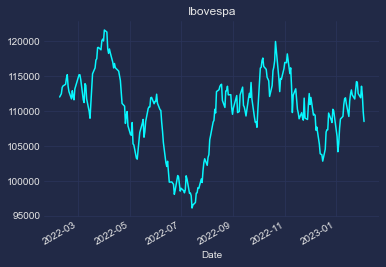

In [65]:
plt.style.use('cyberpunk')

dados_fechamento.plot(y = 'ibovespa', use_index = True, legend = False)
plt.title('Ibovespa')
plt.savefig('ibovespa.png', dpi = 300)
plt.show()

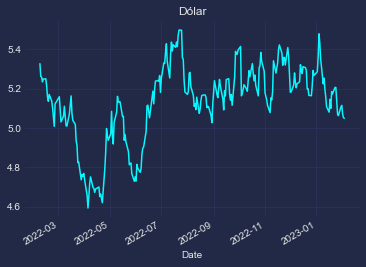

In [66]:
plt.style.use('cyberpunk')

dados_fechamento.plot(y = 'dolar', use_index = True, legend = False)
plt.title('Dólar')
plt.savefig('dolar.png', dpi = 300)
plt.show()